### 数据分析

In [10]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from glob import iglob
import matplotlib.pyplot as plt
from keras.preprocessing import image

%matplotlib inline
random.seed(9527)

In [11]:
def load_dataset(path):
    image_list = []
    images = iglob(path)
    for image in images:
        image_name = os.path.basename(image)
        data = image_name.split('.')
        data[0] = 1 if data[0] == 'dog' else 0
        data.append(image)
        image_list.append(data)
    image_list.sort(key=lambda x: int(x[1]))
    return image_list

In [12]:
train_data = load_dataset('./all/train/*')
# 随机打乱数据集
random.shuffle(train_data)
train_data[:5]

[[1, '446', 'jpg', './all/train\\dog.446.jpg'],
 [0, '4840', 'jpg', './all/train\\cat.4840.jpg'],
 [0, '8467', 'jpg', './all/train\\cat.8467.jpg'],
 [1, '4930', 'jpg', './all/train\\dog.4930.jpg'],
 [1, '7202', 'jpg', './all/train\\dog.7202.jpg']]

In [16]:
# train文件夹图片数量和类型
train_data = np.array(train_data)
train_target = train_data[:, 0]
all_num = len(train_data)
cat_num = (train_target == '0').sum()
dog_num = (train_target == '1').sum()
print("图片共有{}张图片, {}张猫，{}张狗".format(all_num, cat_num, dog_num))

图片共有25000张图片, 12500张猫，12500张狗


In [17]:
# train文件夹中图片的格式
image_format = train_data[:, 2]
print("25000张图片都是jpg格式: {}".format(all(image_format == 'jpg')))

25000张图片都是jpg格式: True


In [18]:
def get_image_shape(files):
    shape_list = []
    for file in files:
        im = image.load_img(file)
        tens = image.img_to_array(im)
        shape_list.append(tens.shape)
    return shape_list

shape_list = get_image_shape(train_data[:, 3])
ordered_shape_list = sorted(shape_list, key=lambda x: x[0]+x[1])

print("最小的图片:{}, 最大的图片:{}".format(ordered_shape_list[0], ordered_shape_list[-1]))

最小的图片:(38, 50, 3), 最大的图片:(768, 1023, 3)


Text(0.5, 1.0, '图片分辨率分布')

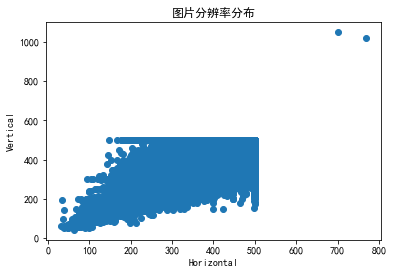

In [19]:
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

x = [x[0] for x in ordered_shape_list]
y = [x[1] for x in ordered_shape_list]
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.xlabel('Horizontal')
plt.ylabel('Vertical')
plt.title('图片分辨率分布')

### 可视化12张图片

In [20]:
train_files, train_targets = train_data[:][:, 3], train_data[:][:, 0]
train_targets = train_targets.astype(int)
train_files[:5], train_targets[:5]

(array(['./all/train\\dog.446.jpg', './all/train\\cat.4840.jpg',
        './all/train\\cat.8467.jpg', './all/train\\dog.4930.jpg',
        './all/train\\dog.7202.jpg'], dtype='<U25'), array([1, 0, 0, 1, 1]))

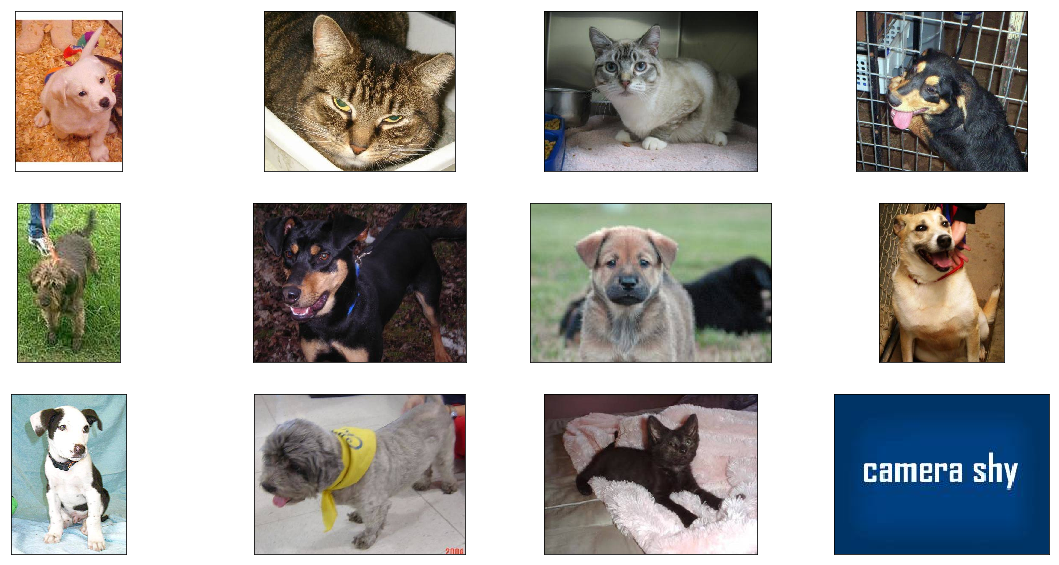

In [21]:
def visualize_img(img_path, ax):
    img = cv2.imread(img_path)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
fig = plt.figure(figsize=(20, 10))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1, xticks=[], yticks=[])
    visualize_img(train_files[i], ax)

可以看到存在既不是猫也不是狗的图片